10, loss= 4324.6992
20, loss= 3227.7791
30, loss= 2434.1377
40, loss= 1859.3098
50, loss= 1442.5532
60, loss= 1140.1229
70, loss= 920.4706
80, loss= 760.8148
90, loss= 644.6845
100, loss= 560.1582


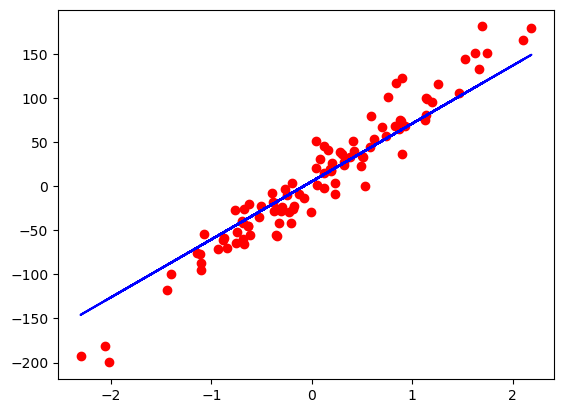

In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features= 1, noise= 20, random_state= 1)

X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y= y.view(y.shape[0],1)

n_samples, n_features = X.shape

# 1) model

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer

learning_rate =.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop

num_epochs = 100
for epoch in range(num_epochs):
    
    #forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    #backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'{epoch+1}, loss= {loss.item():.4f}')
        
#plot

predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
    
    